Lesson 6.1
---

In [1]:
import pandas as pd
import numpy as np

In [2]:

df = pd.DataFrame({
    'Специальность' : ['Ветеринар', 'Ветеринар',
                       'Психолог', 'Психолог'] * 6,
    'Врач' : ['Андрей', 'Сергей', 'Ирина'] * 8,
    'Диагноз' : ['Простуда', 'Простуда', 'Простуда',
                 'Волнения', 'Волнения', 'Простуда'] * 4,
    'Доза' : np.random.randint(low=1, high=6,size=24),
    'Продолжительность' : np.random.randint(low=1, high=6,size=24)
})
df


,Специальность,Врач,Диагноз,Доза,Продолжительность
0,Ветеринар,Андрей,Простуда,3,1
1,Ветеринар,Сергей,Простуда,2,4
2,Психолог,Ирина,Простуда,4,1
3,Психолог,Андрей,Волнения,2,5
4,Ветеринар,Сергей,Волнения,5,1
5,Ветеринар,Ирина,Простуда,2,3
6,Психолог,Андрей,Простуда,4,1
7,Психолог,Сергей,Простуда,2,4
8,Ветеринар,Ирина,Простуда,4,1
9,Ветеринар,Андрей,Волнения,4,4


Посчитаем, сколько раз какой врач ставил каждый из диагнозов, а также суммы по строкам и столбцам


In [3]:
pd.crosstab(index = df['Врач'], columns = df['Диагноз'], margins=True)


Диагноз,Волнения,Простуда,All
Врач,,,
Андрей,4,4,8
Ирина,0,8,8
Сергей,4,4,8
All,8,16,24


In [4]:
# выдает ошибку, потому что не передаем values
#pd.crosstab(index = df['Врач'], columns = df['Диагноз'], aggfunc="mean")


In [5]:
# Посчитаем, какую среднюю дозу какой врач назначал по каждому из диагнозов
pd.crosstab(index = df['Врач'], columns =  df['Диагноз'], values=df['Доза'], aggfunc="mean")


Диагноз,Волнения,Простуда
Врач,,
Андрей,2.50,3.25
Ирина,NaN,3.00
Сергей,4.25,2.25


In [6]:
# Посчитаем, какую среднюю дозу какой врач назначал по каждому из диагнозов
pd.crosstab(index = df['Врач'], columns =  df['Диагноз'], values=df['Доза'], aggfunc=["mean",'count'])


mean             count         
Диагноз Волнения Простуда Волнения Простуда
Врач                                       
Андрей      2.50     3.25      4.0      4.0
Ирина        NaN     3.00      NaN      8.0
Сергей      4.25     2.25      4.0      4.0

Простейший вариант сводной таблицы — среднее в группах, определяемых столбцом. Посчитаем среднее в числовых столбцах по каждому врачу


In [7]:
# Посчитаем, какую среднюю дозу какой врач назначал по каждому из диагнозов
pd.crosstab(index = df['Врач'], columns =  df['Диагноз'], values=df['Доза'], aggfunc=["mean",'count'], margins=True)


mean                       count             
Диагноз Волнения Простуда       All Волнения Простуда All
Врач                                                     
Андрей     2.500    3.250  2.875000      4.0      4.0   8
Ирина        NaN    3.000  3.000000      NaN      8.0   8
Сергей     4.250    2.250  3.250000      4.0      4.0   8
All        3.375    2.875  3.041667      8.0     16.0  24

In [8]:
pd.pivot_table(df, index=['Врач'], values=['Доза', 'Продолжительность'])


,Доза,Продолжительность
Врач,,
Андрей,2.875,3.5
Ирина,3.000,2.5
Сергей,3.250,3.0


In [9]:
pd.pivot_table(df, index=['Врач'], values=['Доза', 'Продолжительность'],
              aggfunc={'Доза': 'mean', 'Продолжительность': 'count'})


,Доза,Продолжительность
Врач,,
Андрей,2.875,8
Ирина,3.000,8
Сергей,3.250,8


In [10]:
df.pivot_table(index=['Врач'], values=['Доза', 'Продолжительность'])

,Доза,Продолжительность
Врач,,
Андрей,2.875,3.5
Ирина,3.000,2.5
Сергей,3.250,3.0


In [11]:
#Посчитаем, сколько раз врач и в какой специальности ставил тот или иной диагноз
pd.pivot_table(df,
               values='Доза',
               index=['Специальность', 'Врач'],
               columns=['Диагноз'],
               aggfunc="count")


Диагноз               Волнения  Простуда
Специальность Врач                      
Ветеринар     Андрей       2.0       2.0
              Ирина        NaN       4.0
              Сергей       2.0       2.0
Психолог      Андрей       2.0       2.0
              Ирина        NaN       4.0
              Сергей       2.0       2.0

In [12]:
#Применим несколько функций и несколько столбцов со значениями
pd.pivot_table(df,
               values=['Доза', 'Продолжительность'],
               index=['Специальность', 'Врач'],
               columns=['Диагноз'],
               aggfunc=["min", "mean", "max"],
               margins=True)


min                                              \
                         Доза              Продолжительность                
Диагноз              Волнения Простуда All          Волнения Простуда All   
Специальность Врач                                                          
Ветеринар     Андрей      2.0      1.0   1               4.0      1.0   1   
              Ирина       NaN      2.0   2               NaN      1.0   1   
              Сергей      3.0      2.0   2               1.0      3.0   1   
Психолог      Андрей      2.0      4.0   2               5.0      1.0   1   
              Ирина       NaN      1.0   1               NaN      1.0   1   
              Сергей      4.0      1.0   1               3.0      4.0   3   
All                       2.0      1.0   1               1.0      1.0   1   

                         mean                                                \
                         Доза                    Продолжительность            
Диагноз              Волнения Простуда       All          Волнения Простуда   
Специальность Врач                                                            
Ветеринар     Андрей    3.000    2.000  2.500000              4.00    3.000   
              Ирина       NaN    3.000  3.000000               NaN    2.750   
              Сергей    4.000    3.000  3.500000              1.00    3.500   
Психолог      Андрей    2.000    4.500  3.250000              5.00    2.000   
              Ирина       NaN    3.000  3.000000               NaN    2.250   
              Сергей    4.500    1.500  3.000000              3.00    4.500   
All                     3.375    2.875  3.041667              3.25    2.875   

                                max                                          \
                               Доза              Продолжительность            
Диагноз                All Волнения Простуда All          Волнения Простуда   
Специальность Врач                                                            
Ветеринар     Андрей  3.50      4.0      3.0   4               4.0      5.0   
              Ирина   2.75      NaN      4.0   4               NaN      4.0   
              Сергей  2.25      5.0      4.0   5               1.0      4.0   
Психолог      Андрей  3.50      2.0      5.0   5               5.0      3.0   
              Ирина   2.25      NaN      5.0   5               NaN      4.0   
              Сергей  3.75      5.0      2.0   5               3.0      5.0   
All                   3.00      5.0      5.0   5               5.0      5.0   

                          
                          
Диагноз              All  
Специальность Врач        
Ветеринар     Андрей   5  
              Ирина    4  
              Сергей   4  
Психолог      Андрей   5  
              Ирина    4  
              Сергей   5  
All                    5

In [13]:
#Применим несколько функций и несколько столбцов со значениями
pd.pivot_table(df,
               values=['Доза', 'Продолжительность'],
               index=['Специальность', 'Врач'],
               columns=['Диагноз'],
               margins=True)


Доза                    Продолжительность           \
Диагноз              Волнения Простуда       All          Волнения Простуда   
Специальность Врач                                                            
Ветеринар     Андрей    3.000    2.000  2.500000              4.00    3.000   
              Ирина       NaN    3.000  3.000000               NaN    2.750   
              Сергей    4.000    3.000  3.500000              1.00    3.500   
Психолог      Андрей    2.000    4.500  3.250000              5.00    2.000   
              Ирина       NaN    3.000  3.000000               NaN    2.250   
              Сергей    4.500    1.500  3.000000              3.00    4.500   
All                     3.375    2.875  3.041667              3.25    2.875   

                            
Диагноз                All  
Специальность Врач          
Ветеринар     Андрей  3.50  
              Ирина   2.75  
              Сергей  2.25  
Психолог      Андрей  3.50  
              Ирина   2.25  
              Сергей  3.75  
All                   3.00

Магия Jupyter
--

In [14]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [15]:
?%time


Docstring:
Time execution of a Python statement or expression.

The CPU and wall clock times are printed, and the value of the
expression (if any) is returned.  Note that under Win32, system time
is always reported as 0, since it can not be measured.

This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, you can time the cell body (a directly
  following statement raises an error).

This function provides very basic timing functionality.  Use the timeit
magic for more control over the measurement.

.. versionchanged:: 7.3
    User variables are no longer expanded,
    the magic line is always left unmodified.

Examples
--------
::

  In [1]: %time 2**128
  CPU times: user 0.00 s, sys: 0.00 s, total: 0.00 s
  Wall time: 0.00
  Out[1]: 340282366920938463463374607431768211456L

  In [2]: n = 1000000

  In [3]: %time sum(range(n))
  CPU times: user 1.20 s,

Вспомните команды: %time, %timeit, %%time
Эти три команды замеряют, как долго исполняется код. Коменда %timeit запускает команду несколько раз. По результатам вычисляется среднее и стандартное отклонение. Это уместно, если функция зависит от случайных битов. Для примера напишем функцию, которая генерирует случайное число и засыпает на одну секунду, если оно нечётное.


In [16]:
import time
import numpy as np

def sleep_if_odd():
    rvs = np.random.randint(low=0, high=int(1e9))
    randbit = rvs % 2
    if randbit % 2 == 1:
        time.sleep(1)

In [17]:
%time sleep_if_odd()


CPU times: user 43 µs, sys: 6 µs, total: 49 µs
Wall time: 52 µs


При использовании %timeit можно указать, сколько раз нужно запустить функцию. Синтаксис — %timeit -n Дефолтное значение — 7.


In [18]:
%timeit -n 10 sleep_if_odd()


The slowest run took 4.01 times longer than the fastest. This could mean that an intermediate result is being cached.
489 ms ± 190 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%%writefile test.py
print("Hello, World!")


Overwriting test.py


In [20]:
%pycat test.py


print("Hello, World!")


%system, %%bash
Позволяет выполнять системные команды так, будто вы работаете в терминале.


In [21]:
%system date


['Thu Nov 21 11:23:23 CET 2024']

In [22]:
!date


Thu Nov 21 11:23:23 CET 2024


Практика
---

У вас есть датафрейм с информацией о покупках различных товаров разными клиентами. Кроме того, у вас есть информация о поле каждого клиента и категории товаров. Необходимо создать сводную таблицу, чтобы проанализировать, какие категории товаров покупаются чаще всего мужчинами и женщинами разных возрастных групп.


In [23]:
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8],
    'Age': [25, 35, 45, 55, 25, 35, 45, 55],
    'Gender': ['M', 'M', 'M', 'M', 'F', 'F', 'F', 'F'],
    'Category': ['Electronics', 'Fashion', 'Electronics', 'Fashion', 'Electronics', 'Fashion', 'Electronics', 'Fashion']
}


In [24]:
df = pd.DataFrame(data)
df

,CustomerID,Age,Gender,Category
0,1,25,M,Electronics
1,2,35,M,Fashion
2,3,45,M,Electronics
3,4,55,M,Fashion
4,5,25,F,Electronics
5,6,35,F,Fashion
6,7,45,F,Electronics
7,8,55,F,Fashion


In [25]:
df.pivot_table(index=['Gender'], columns='Category', aggfunc='mean',values='Age')

Category,Electronics,Fashion
Gender,,
F,35,45
M,35,45


In [26]:
pd.pivot_table(df,index=['Gender', 'Age'], columns='Category',aggfunc='count')


CustomerID        
Category   Electronics Fashion
Gender Age                    
F      25          1.0     NaN
       35          NaN     1.0
       45          1.0     NaN
       55          NaN     1.0
M      25          1.0     NaN
       35          NaN     1.0
       45          1.0     NaN
       55          NaN     1.0

In [27]:
df.pivot_table(index=['Gender', 'Age'], columns='Category', aggfunc='size')

Category    Electronics  Fashion
Gender Age                      
F      25           1.0      NaN
       35           NaN      1.0
       45           1.0      NaN
       55           NaN      1.0
M      25           1.0      NaN
       35           NaN      1.0
       45           1.0      NaN
       55           NaN      1.0

In [28]:
df.pivot_table(index=['Gender', 'Age'], columns='Category', aggfunc='size', fill_value=0)


Category    Electronics  Fashion
Gender Age                      
F      25             1        0
       35             0        1
       45             1        0
       55             0        1
M      25             1        0
       35             0        1
       45             1        0
       55             0        1

 У вас есть датафрейм с результатами опроса, в котором каждый респондент указал свой пол и предпочтения по категориям товаров. Необходимо создать таблицу сопряженности и добавить в нее процентные значения по строкам или столбцам.


In [29]:
data = {
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female'],
    'Category': ['Electronics', 'Fashion', 'Electronics', 'Fashion', 'Electronics', 'Fashion']
}

df = pd.DataFrame(data)

In [30]:
df1 = (np.round(pd.crosstab(index=df['Gender'], columns = df['Category'],
           normalize=True),2)*100)

In [31]:
df1.applymap(lambda x: x+2)

Category,Electronics,Fashion
Gender,,
Female,19.0,35.0
Male,35.0,19.0


In [32]:
pd.crosstab(index=df['Gender'], columns = df['Category'],
           normalize=True)

Category,Electronics,Fashion
Gender,,
Female,0.166667,0.333333
Male,0.333333,0.166667


Markdown text
====

$$x^2+y^2 = 0$$

Lesson 6.2
==
Визуализация с помощью matplotlib
--
 Общий синтаксис.


In [33]:
import matplotlib.pyplot as plt


In [34]:
%matplotlib inline


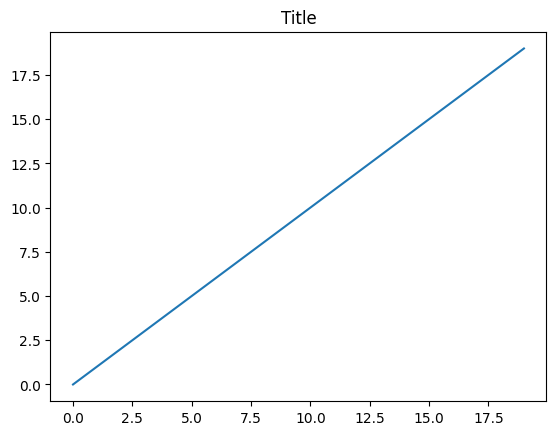

In [35]:
plt.plot(range(20), range(20))
plt.title("Title")
plt.show()


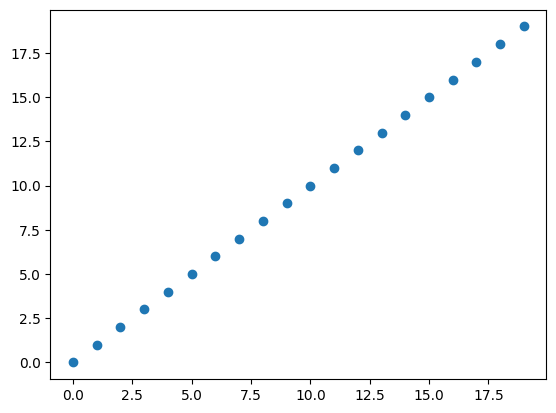

In [36]:
plt.scatter(range(20), range(20))
plt.show()


In [37]:
points=[(-4,-7), (-6,-1), (-7,4), (-8,4), (-10,3), (-11,5), (-8,7), (-6,7), (-6,6), (-6.5,5),   (-7.5,5), (-8,6), (-8,7), (-6,7), (-5,6), (-4,4), (-2,3), (4,3), (5,2), (9,4), (5,1), (5,-3), (6,-7), (5,-7), (4,-5), (1,0), (-2,-1), (-3,-1), (-3,-7), (-4,-7)]

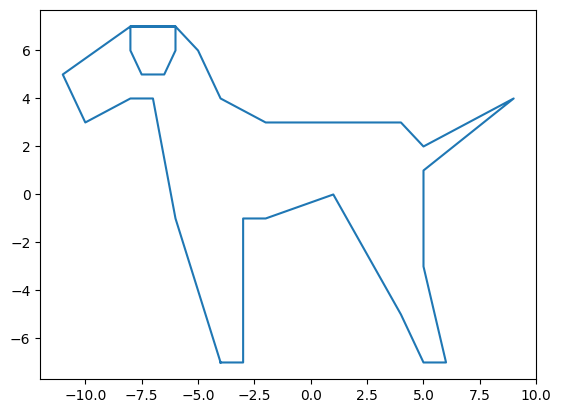

In [38]:
x = [p[0] for p in points]
y = [p[1] for p in points]
plt.plot(x,y)
plt.show()

Настройка стилей графиков.
--
Matplotlib позволяет настраивать стили линий, цвета, типы маркеров и многое другое, чтобы сделать визуализацию данных максимально информативной и привлекательной. 


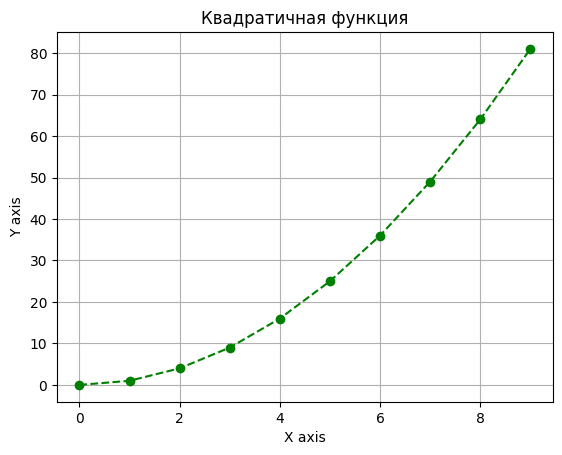

In [39]:
plt.plot(range(10), [x**2 for x in range(10)], linestyle='--', color='green', marker='o')
plt.title("Квадратичная функция")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.grid(True)
plt.show()


На одной системе координат можно изображать несколько графиков и добавлять к графикам пояснение (“легенду”):


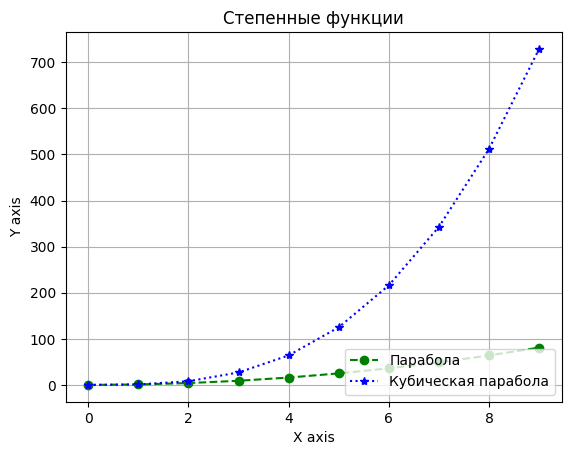

In [40]:
plt.plot(range(10), [x**2 for x in range(10)], linestyle='--', color='green', marker='o', label='Парабола')
plt.plot(range(10), [x**3 for x in range(10)], linestyle='dotted', color='blue', marker='*', label='Кубическая парабола')
plt.title("Степенные функции")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


Различные виды графиков
==
Гистограммы и распределения.
--

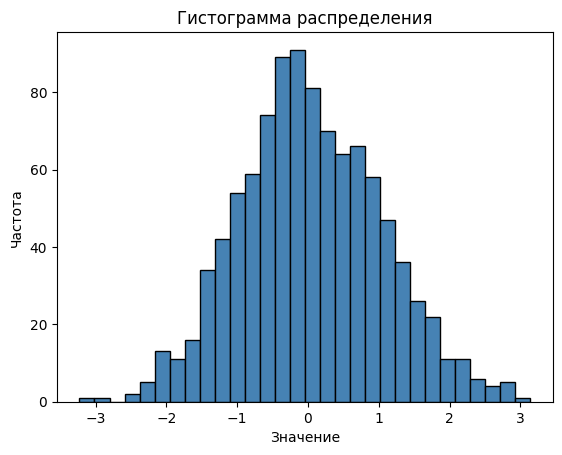

In [41]:
data = np.random.randn(1000)
plt.hist(data, bins=30, color='steelblue', edgecolor='black')
plt.title("Гистограмма распределения")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()


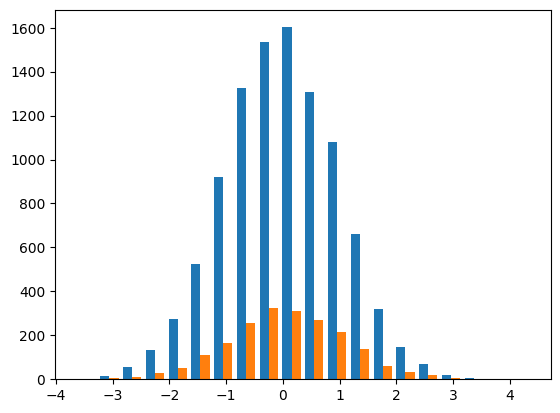

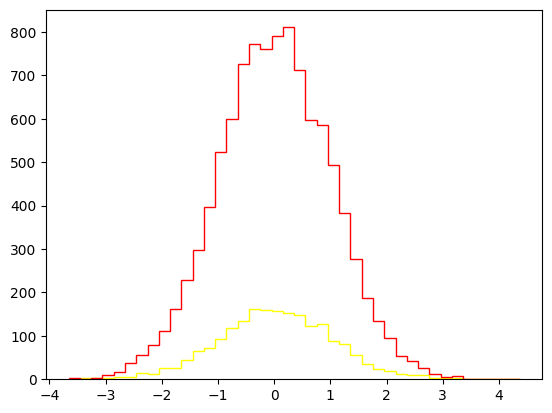

In [42]:
data1 = np.random.randn(10000)
data2 = np.random.randn(2000)
plt.hist([data1, data2], bins=20)
plt.show()
plt.hist([data1, data2], bins=40, histtype='step', color=['red','yellow'])
plt.show()


Круговые диаграммы.
--

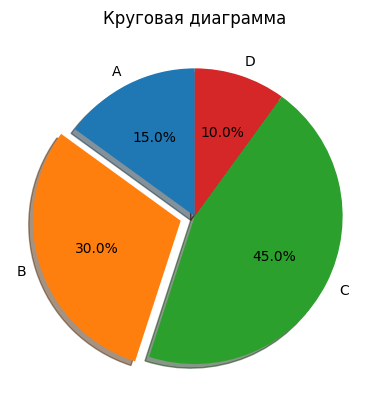

In [43]:
labels = 'A', 'B', 'C', 'D'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # выделяем второй сектор

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Круговая диаграмма")
plt.show()


Столбчатые диаграммы.
---

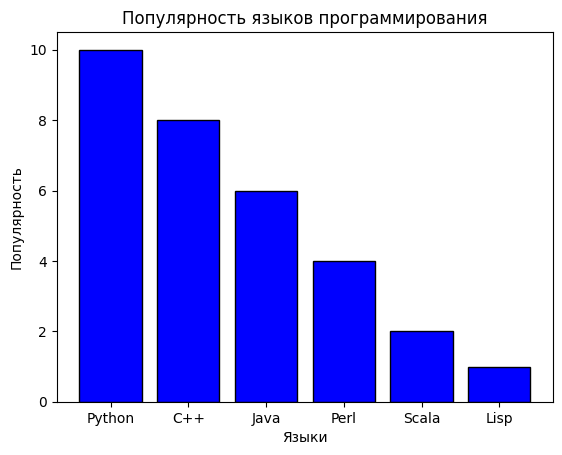

In [44]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
performance = [10,8,6,4,2,1]

plt.bar(objects, performance, color='blue', edgecolor='black')
plt.title("Популярность языков программирования")
plt.xlabel("Языки")
plt.ylabel("Популярность")
plt.show()


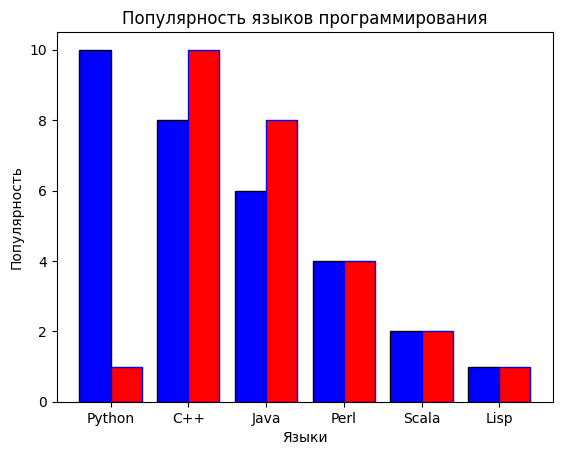

In [45]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
performance2020 = [10,8,6,4,2,1]
performance2000 = [1,10,8,4,2,1]
index=np.arange(0,2*len(objects),2)

plt.bar(index, performance2020, color='blue', edgecolor='black', width=0.8)
plt.bar(index+0.8, performance2000, color='red', edgecolor='blue', width=0.8)
plt.xticks(index+0.4, objects)
plt.title("Популярность языков программирования")
plt.xlabel("Языки")
plt.ylabel("Популярность")
plt.show()


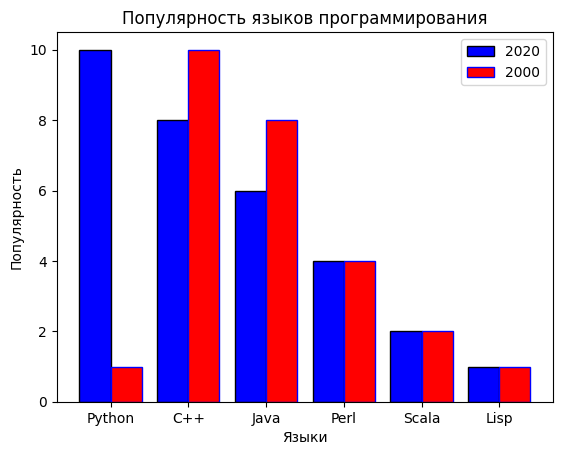

In [46]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
performance2020 = [10,8,6,4,2,1]
performance2000 = [1,10,8,4,2,1]
index=np.arange(0,2*len(objects),2)

plt.bar(index, performance2020, color='blue', edgecolor='black', width=0.8, label = '2020')
plt.bar(index+0.8, performance2000, color='red', edgecolor='blue', width=0.8, label = '2000')
plt.xticks(index+0.4, objects)
plt.title("Популярность языков программирования")
plt.xlabel("Языки")
plt.ylabel("Популярность")
plt.legend()
plt.show()


Настройка осей и сетки.
--

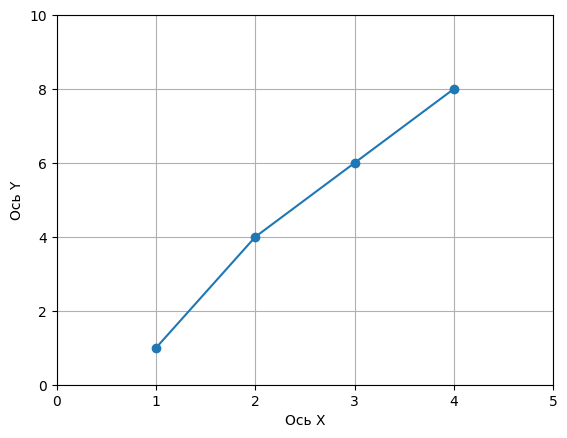

In [47]:
x = range(1, 5)
y = [1, 4, 6, 8]
plt.plot(x, y, marker='o')
plt.xlim(0, 5)  # Установка пределов оси X
plt.ylim(0, 10)  # Установка пределов оси Y
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
#plt.xticks определяет размер грида по оси х 
plt.grid(True)  # Включение отображения сетки
plt.show()


Работа с текстом и аннотациями на графиках.
==

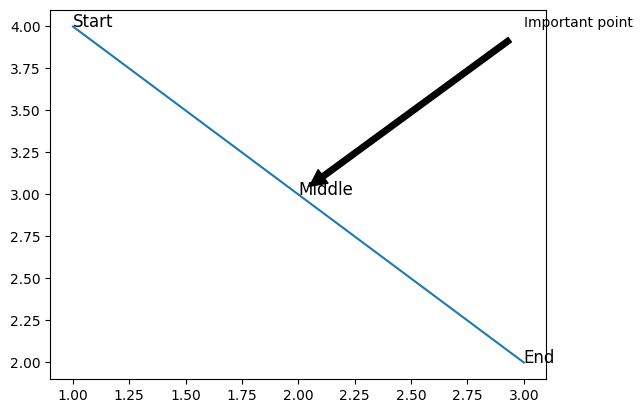

In [48]:
plt.plot([1, 2, 3], [4, 3, 2])
plt.text(1, 4, "Start", fontsize=12)
plt.text(2, 3, "Middle", fontsize=12)
plt.text(3, 2, "End", fontsize=12)
plt.annotate('Important point', xy=(2, 3), xytext=(3, 4),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


Сохранение графиков.
---

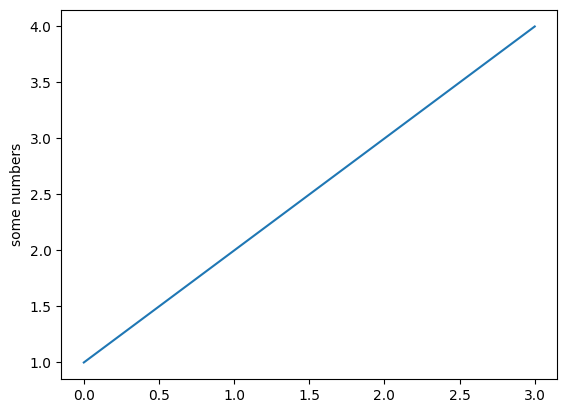

In [49]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
# Сохранение графика в файл. Указывайте путь и формат файла.
plt.savefig('my_figure.png')


Решение задач
---
 Нарисуйте график квадратичной функции $y=x^2$. Сделайте заголовок этого графика, подпишите точку с координатами (2; 4) как важную, подпишите оси координат.


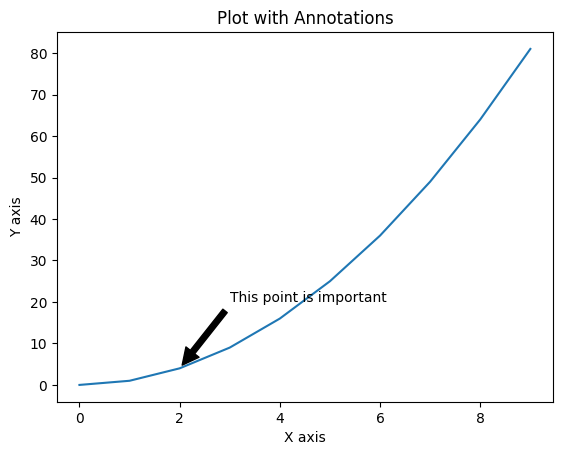

In [50]:
x = np.arange(0, 10, 1)
y = x**2
plt.plot(x, y)
plt.title('Plot with Annotations')
plt.annotate('This point is important', xy=(2, 4), xytext=(3, 20),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()


Постройте столбчатую диаграмму для функции из предыдущей задачи. Отобразите график и столбчатую диаграмму на одном рисунке. Добавьте на функцию маркеры, дополните рисунок легендой.


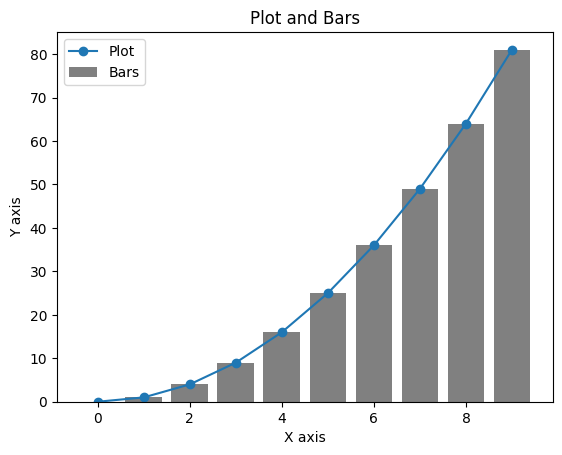

In [51]:
x = np.arange(0, 10, 1)
y = x**2
plt.plot(x, y, marker='o', label='Plot')
plt.bar(x, y, color='gray', label='Bars')
plt.title('Plot and Bars')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()


In [52]:
plt.savefig('/Users/krystynaisakova/Downloads/my_fig.png')

<Figure size 640x480 with 0 Axes>